In [1]:
# Importowanie bibliotek do analizy danych
import pandas as pd
import numpy as np
import random as rnd

# Importowanie bilbiotek do wizualizacji danych
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importowanie bilbiotek do uczenia maszynowego
from sklearn import metrics, svm
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Wczytywanie danych z plikow csv
train_df = pd.read_csv('train2.csv')
test_df = pd.read_csv('test2.csv')

In [3]:
# Zmniejszanie ilosci danych by przyspieszyc obliczenia
train_df = train_df.iloc[4435000:,]
test_df = test_df.iloc[1925000:,]

In [4]:
# Zmiana matchType na wartosci liczbowe
train_df['matchType'] = train_df['matchType'].map( {'solo': 0, 'solo-fpp': 1, 'duo': 2, 'duo-fpp': 3, 'squad': 4, 'squad-fpp' : 5} ).dropna().astype(int)
test_df['matchType'] = test_df['matchType'].map( {'solo': 0, 'solo-fpp': 1, 'duo': 2, 'duo-fpp': 3, 'squad': 4, 'squad-fpp' : 5} ).dropna().astype(int)

In [5]:
# Definicja funkcji do dzielenia wartosci ciaglych przedzialy
def przedzialy(nazwa, ilosc_przedzialow):    
    global train_df
    global test_tf
    
    both_df = [train_df, test_df]
    
    for dataset in both_df:
        minimum = dataset[nazwa].min()
        maximum = dataset[nazwa].max()
        krok = (maximum - minimum) / ilosc_przedzialow
    
        tablica_zakresow = []
        tablica_nazw = []
    
        for i in range(0, ilosc_przedzialow):
            tablica_zakresow.append(i * krok)
    
        for i in range(0, ilosc_przedzialow - 1):
            tablica_nazw.append(i)
            
        tablica_zakresow.append(krok * ilosc_przedzialow)
        tablica_nazw.append(ilosc_przedzialow)
    
        tablica_zakresow[0] -= krok * 0.01
    
        dataset[nazwa + "Band"] = pd.cut(dataset[nazwa], tablica_zakresow, labels=tablica_nazw)
        dataset = dataset.drop([nazwa], axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


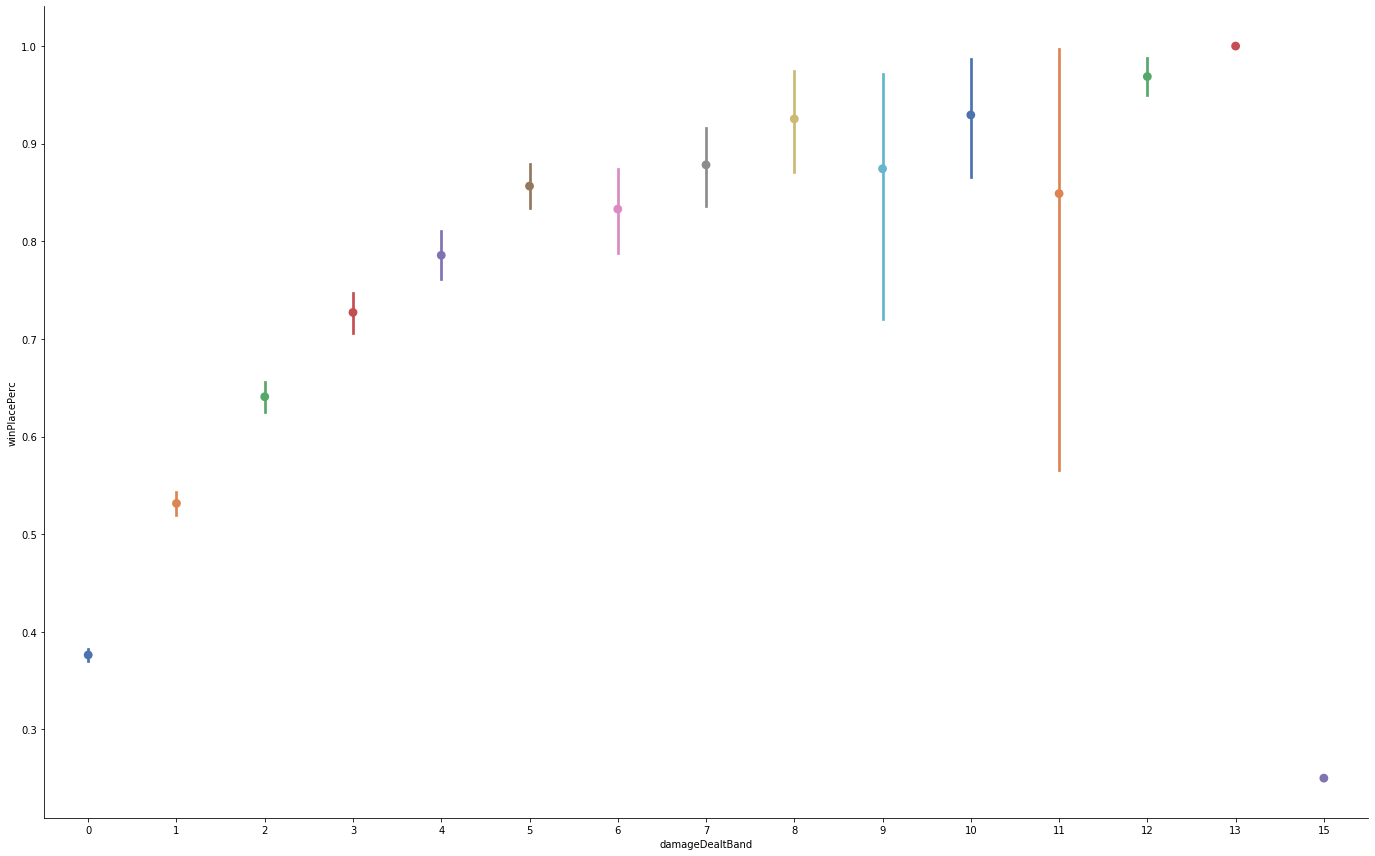

In [6]:
# Podzielenie kolumny damageDealt, oraz wizualizacja powiazania tej wartosci z winPlacePerc
przedzialy('damageDealt', 15)

Grid = sns.FacetGrid(train_df, size=12, aspect=1.6)
Grid.map(sns.pointplot, 'damageDealtBand', 'winPlacePerc', palette='deep')

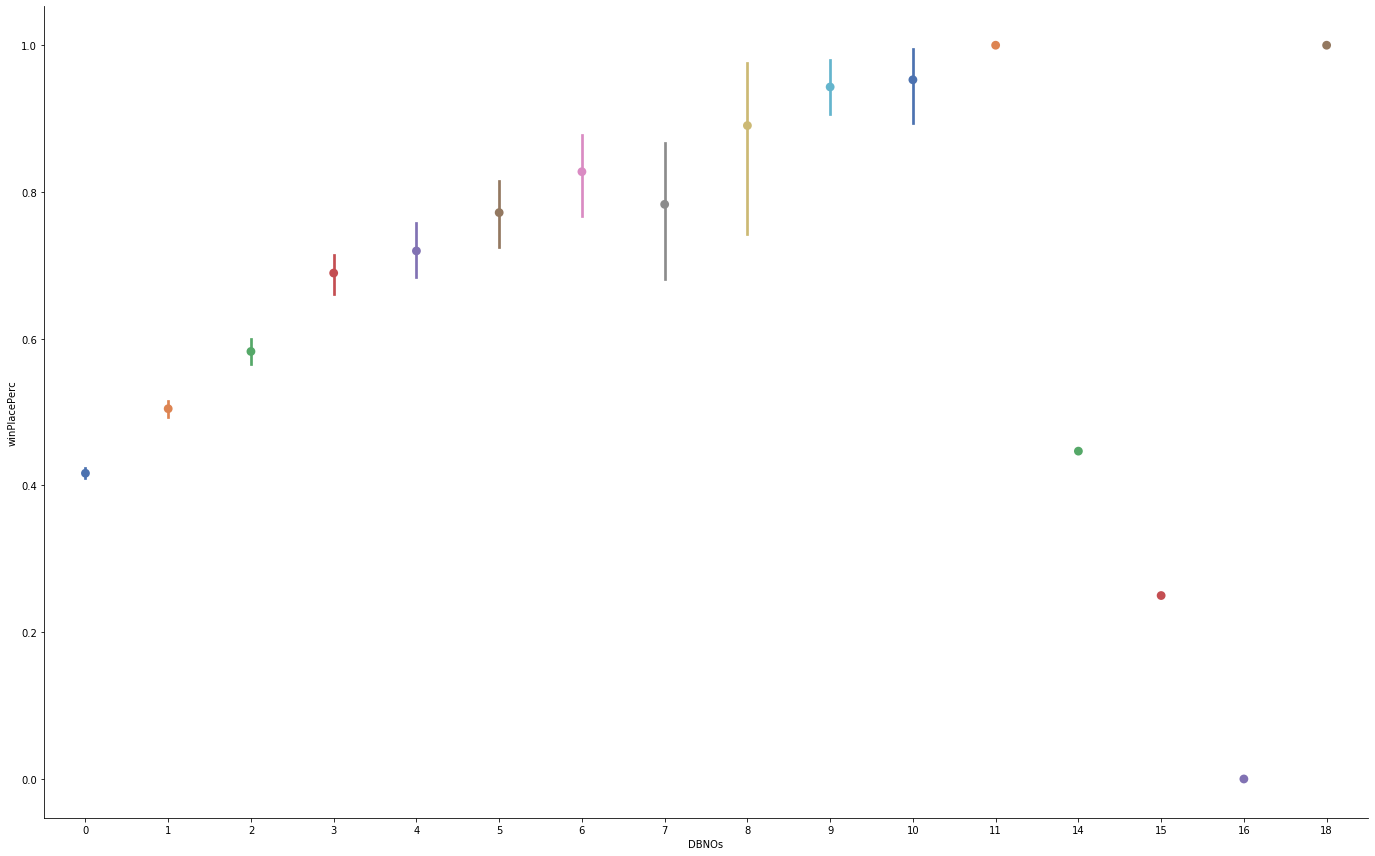

In [7]:
# Wizualizacja powiazania DBNOs z winPlacePerc

Grid = sns.FacetGrid(train_df, size=12, aspect=1.6)
Grid.map(sns.pointplot, 'DBNOs', 'winPlacePerc', palette='deep')

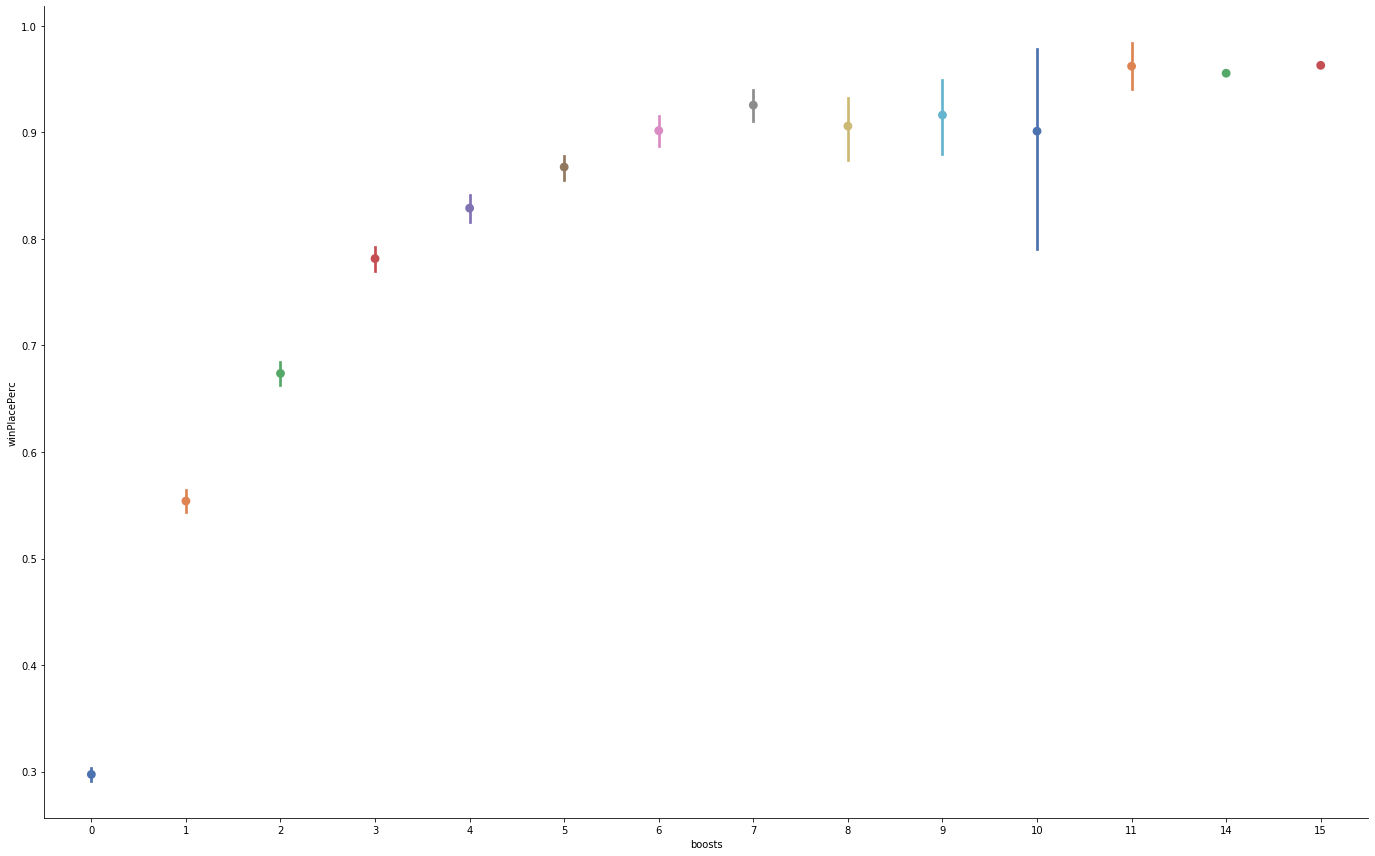

In [8]:
# Wizualizacja powiazania boosts z winPlacePerc

Grid = sns.FacetGrid(train_df, size=12, aspect=1.6)
Grid.map(sns.pointplot, 'boosts', 'winPlacePerc', palette='deep')

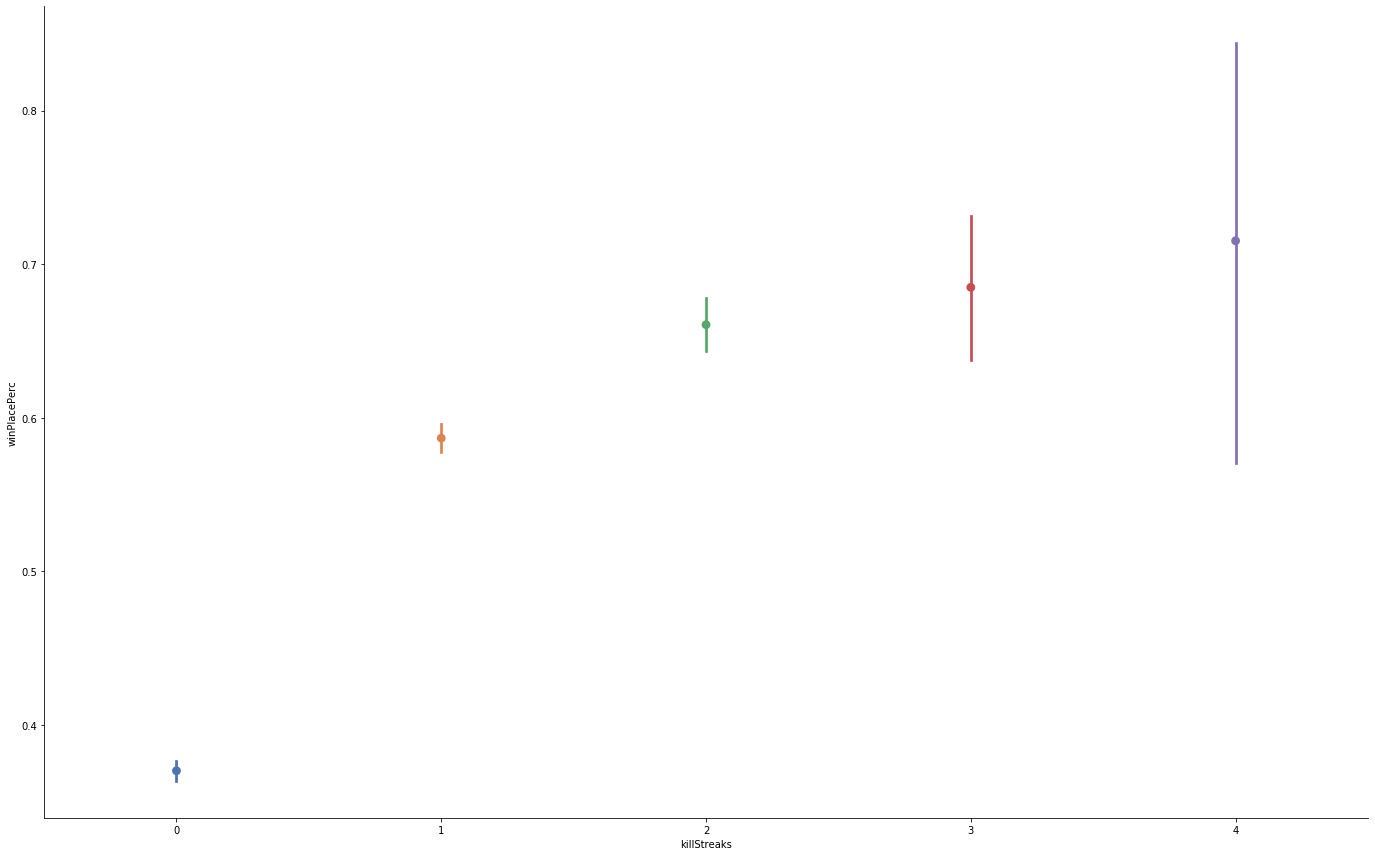

In [9]:
# Wizualizacja powiazania killStreaks z winPlacePerc

Grid = sns.FacetGrid(train_df, size=12, aspect=1.6)
Grid.map(sns.pointplot, 'killStreaks', 'winPlacePerc', palette='deep')

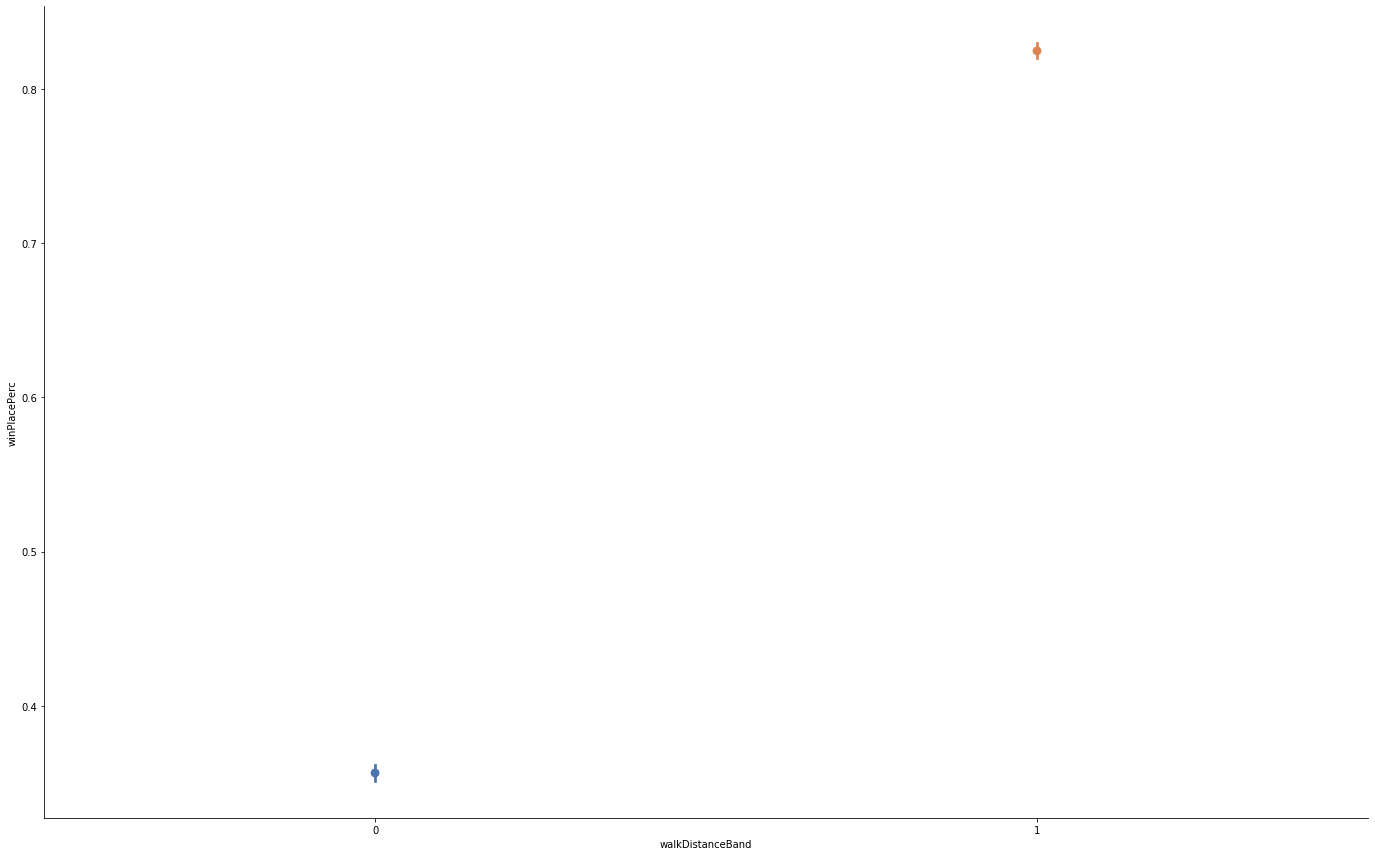

In [10]:
# Progowanie walkDistance - przypisywanie wartosci 0 jezeli gracz przeszedl mniej niz 2000 jednostek
# w przeciwnym razie przypisywanie 1

tablica_zakresow = [-1, 2000, 30000]
tablica_nazw = [0, 1]

train_df["walkDistance" + "Band"] = pd.cut(train_df["walkDistance"], tablica_zakresow, labels=tablica_nazw)
test_df["walkDistance" + "Band"] = pd.cut(test_df["walkDistance"], tablica_zakresow, labels=tablica_nazw)

Grid = sns.FacetGrid(train_df, size=12, aspect=1.6)
Grid.map(sns.pointplot, 'walkDistanceBand', 'winPlacePerc', palette='deep')

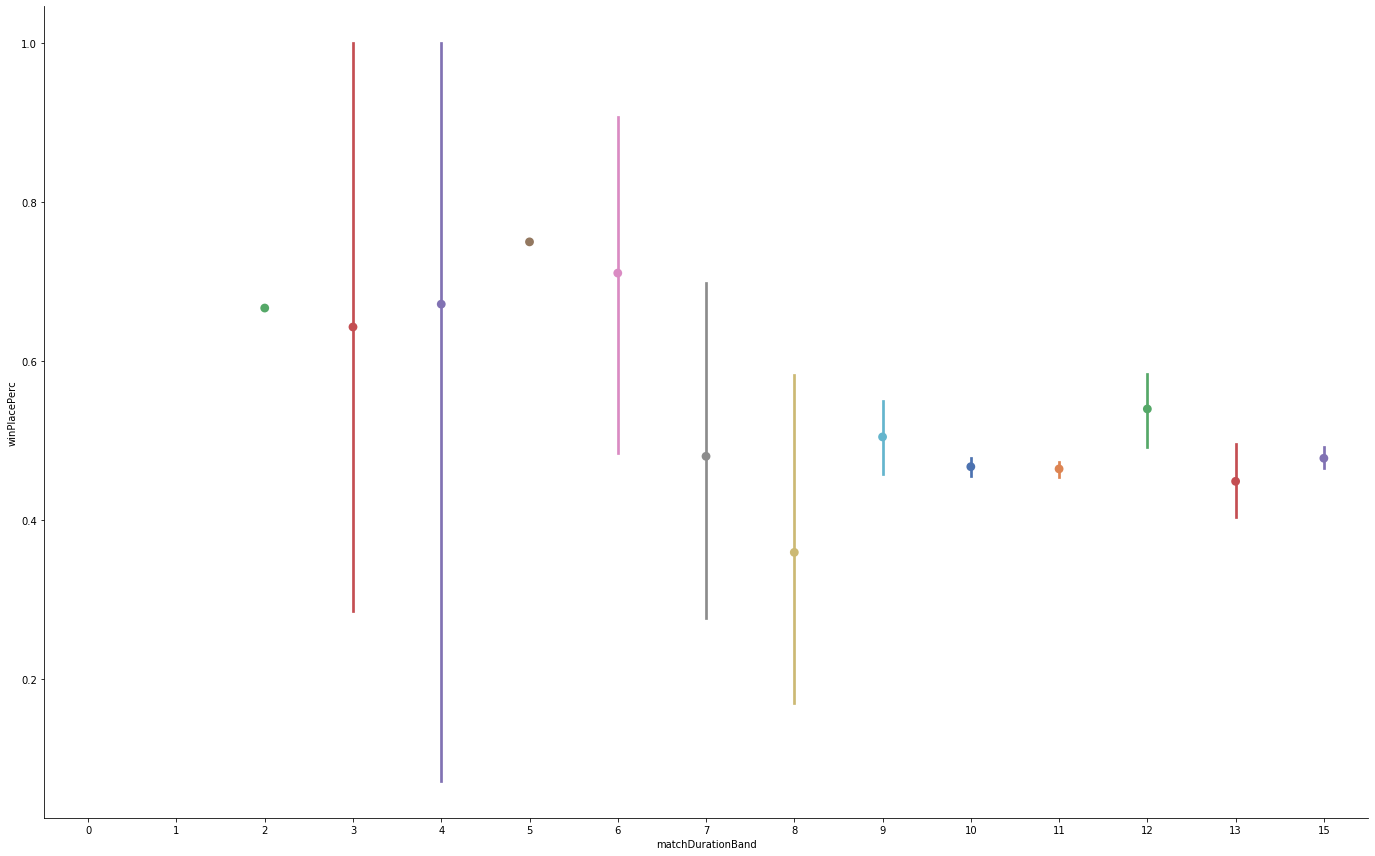

In [11]:
# Podzielenie matchDuration na 15 przedzialow oraz wizualiacja powiazania tej wartosci z winPlacePerc
przedzialy('matchDuration', 15)

Grid = sns.FacetGrid(train_df, size=12, aspect=1.6)
Grid.map(sns.pointplot, 'matchDurationBand', 'winPlacePerc', palette='deep')

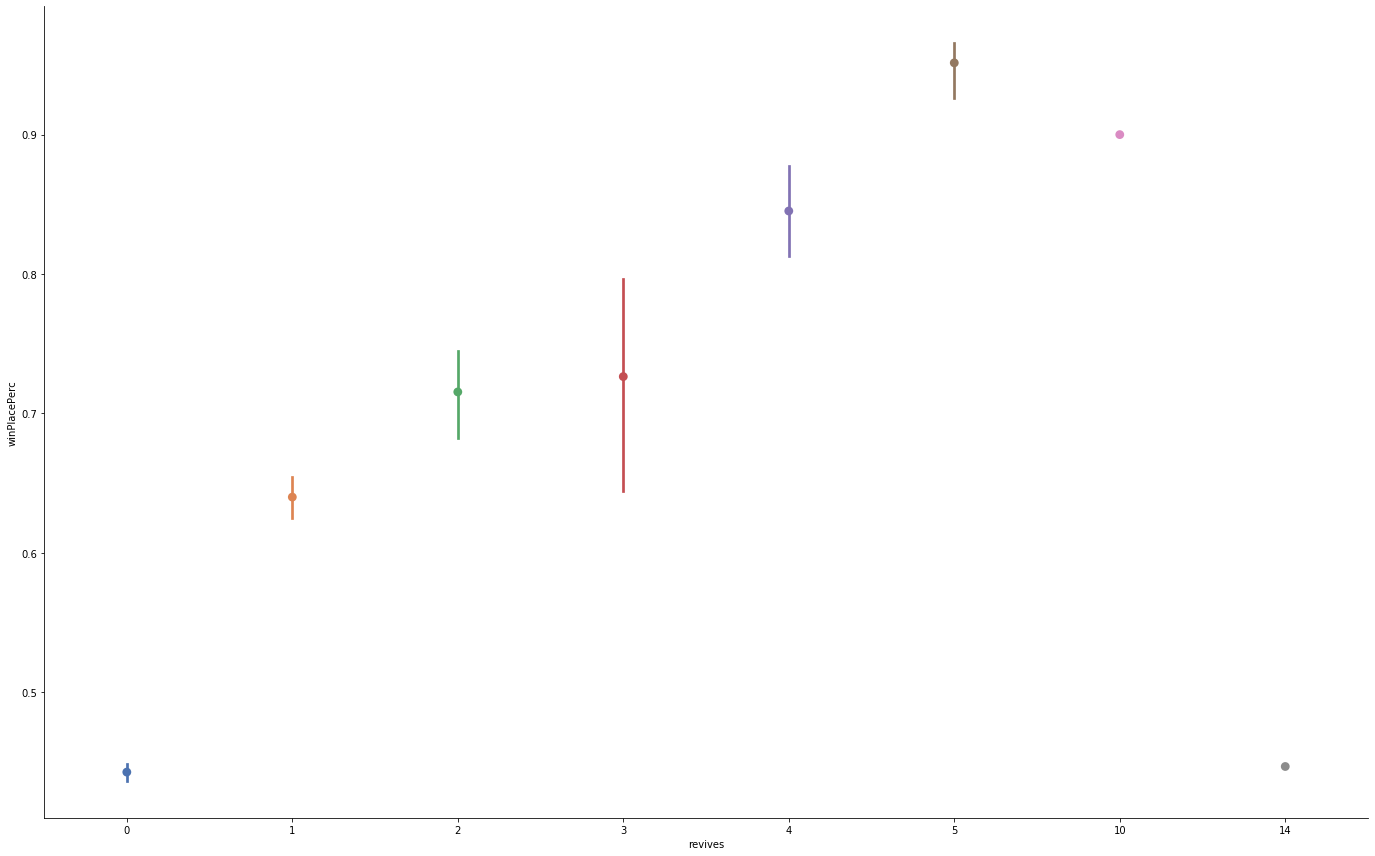

In [12]:
# Wizualizacja powiazania revives z winPlacePerc

Grid = sns.FacetGrid(train_df, size=12, aspect=1.6)
Grid.map(sns.pointplot, 'revives', 'winPlacePerc', palette='deep')

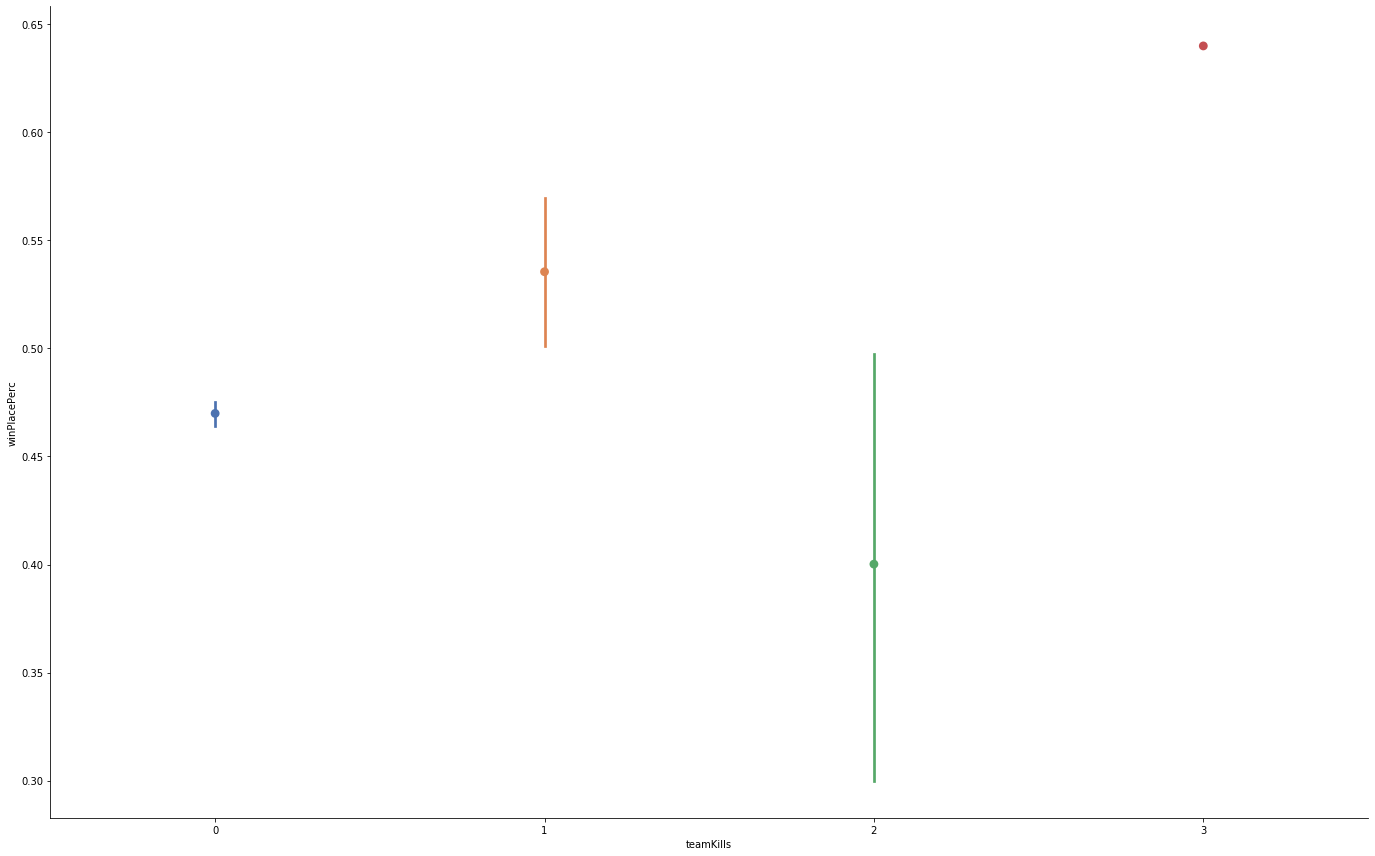

In [13]:
# Wizualizacja powiazania teamKills z winPlacePerc

Grid = sns.FacetGrid(train_df, size=12, aspect=1.6)
Grid.map(sns.pointplot, 'teamKills', 'winPlacePerc', palette='deep')

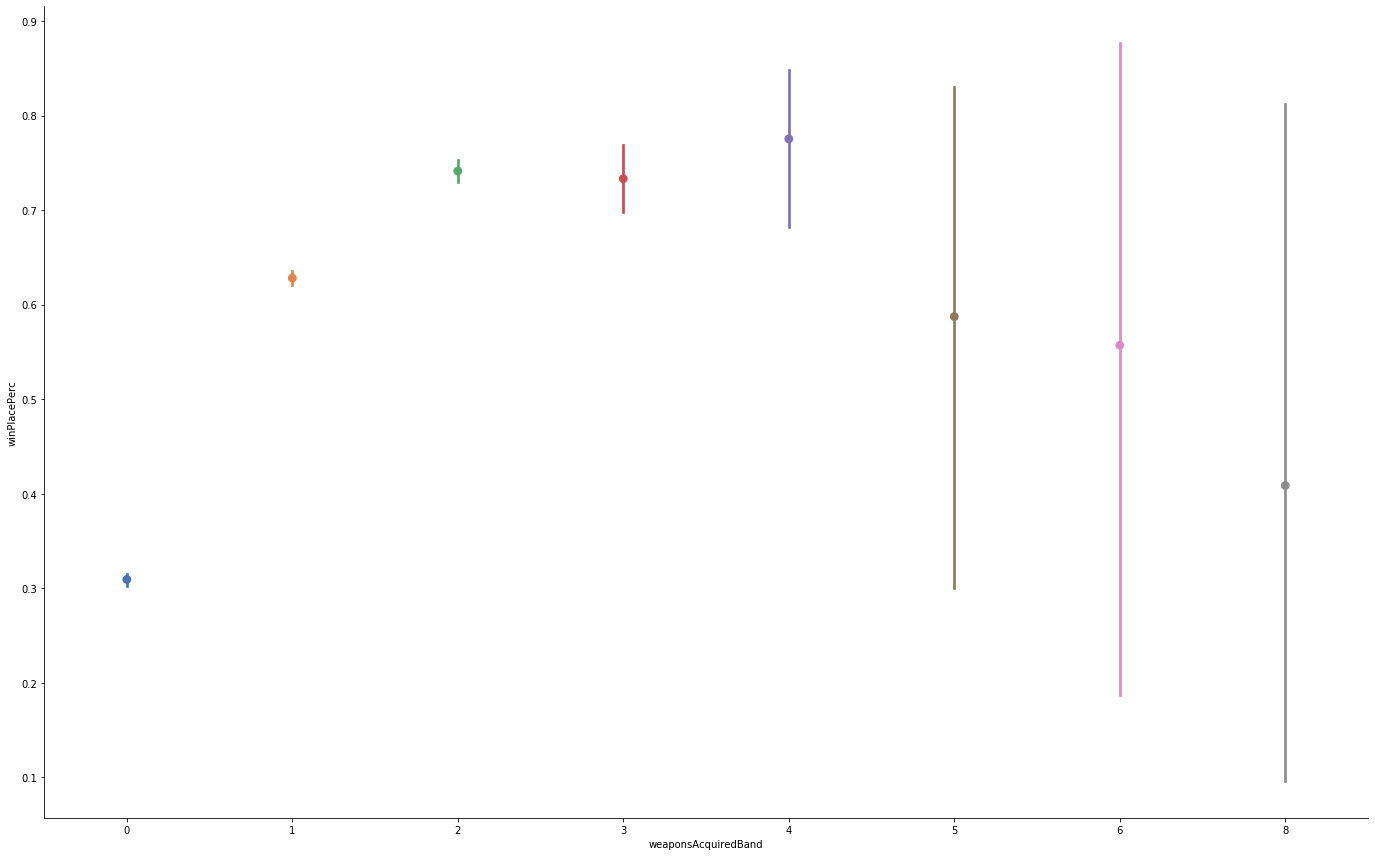

In [14]:
# Podzielenie weaponsAcquired na 8 przedzialow i wizualizacji powiazania tej wartosci z winPlacePerc
przedzialy('weaponsAcquired', 8)

Grid = sns.FacetGrid(train_df, size=12, aspect=1.6)
Grid.map(sns.pointplot, 'weaponsAcquiredBand', 'winPlacePerc', palette='deep')

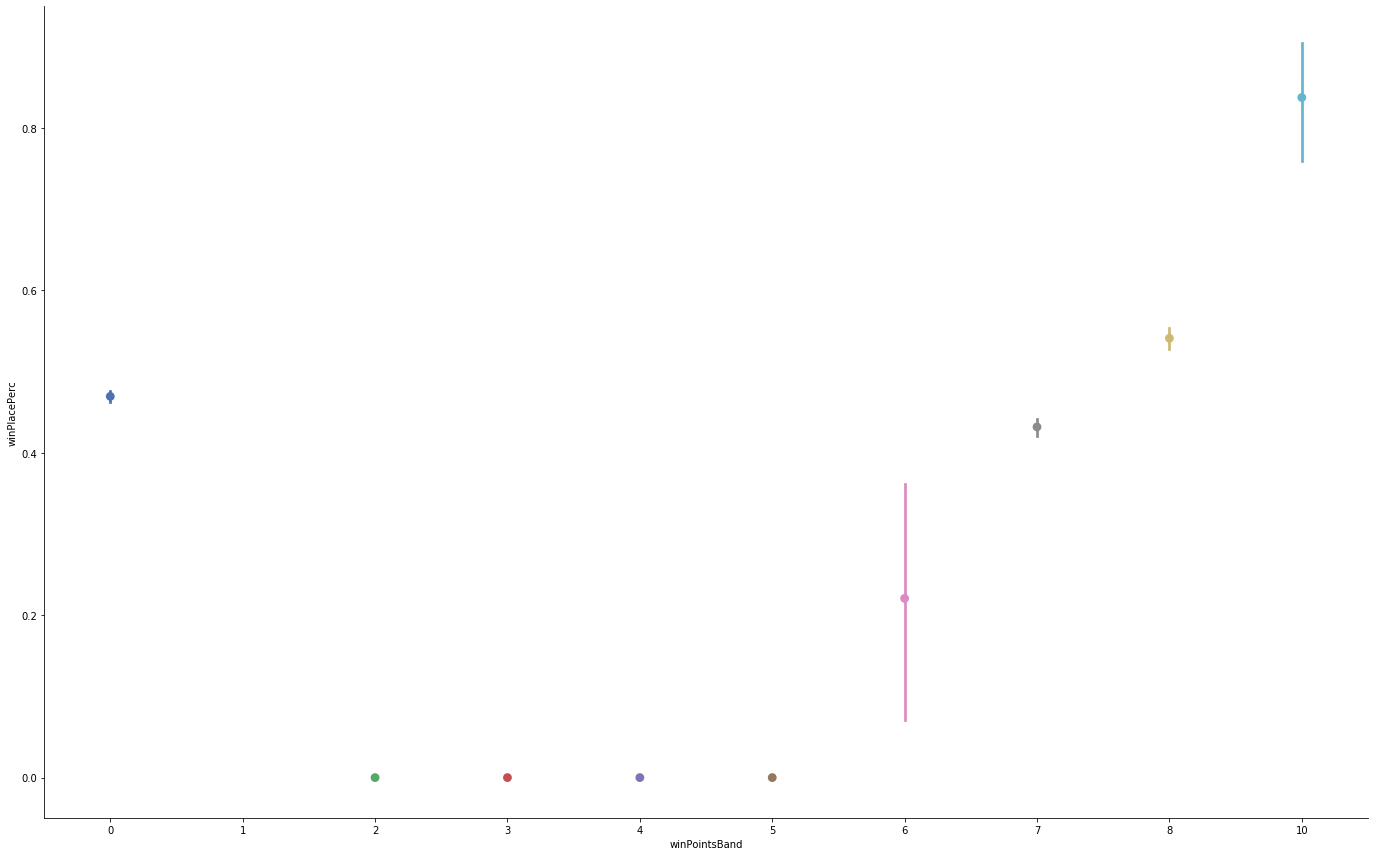

In [15]:
# Podzielenie winPoints na 10 przedzialow i wizualizacji powiazania tej wartosci z winPlacePerc
przedzialy('winPoints', 10)

Grid = sns.FacetGrid(train_df, size=12, aspect=1.6)
Grid.map(sns.pointplot, 'winPointsBand', 'winPlacePerc', palette='deep')

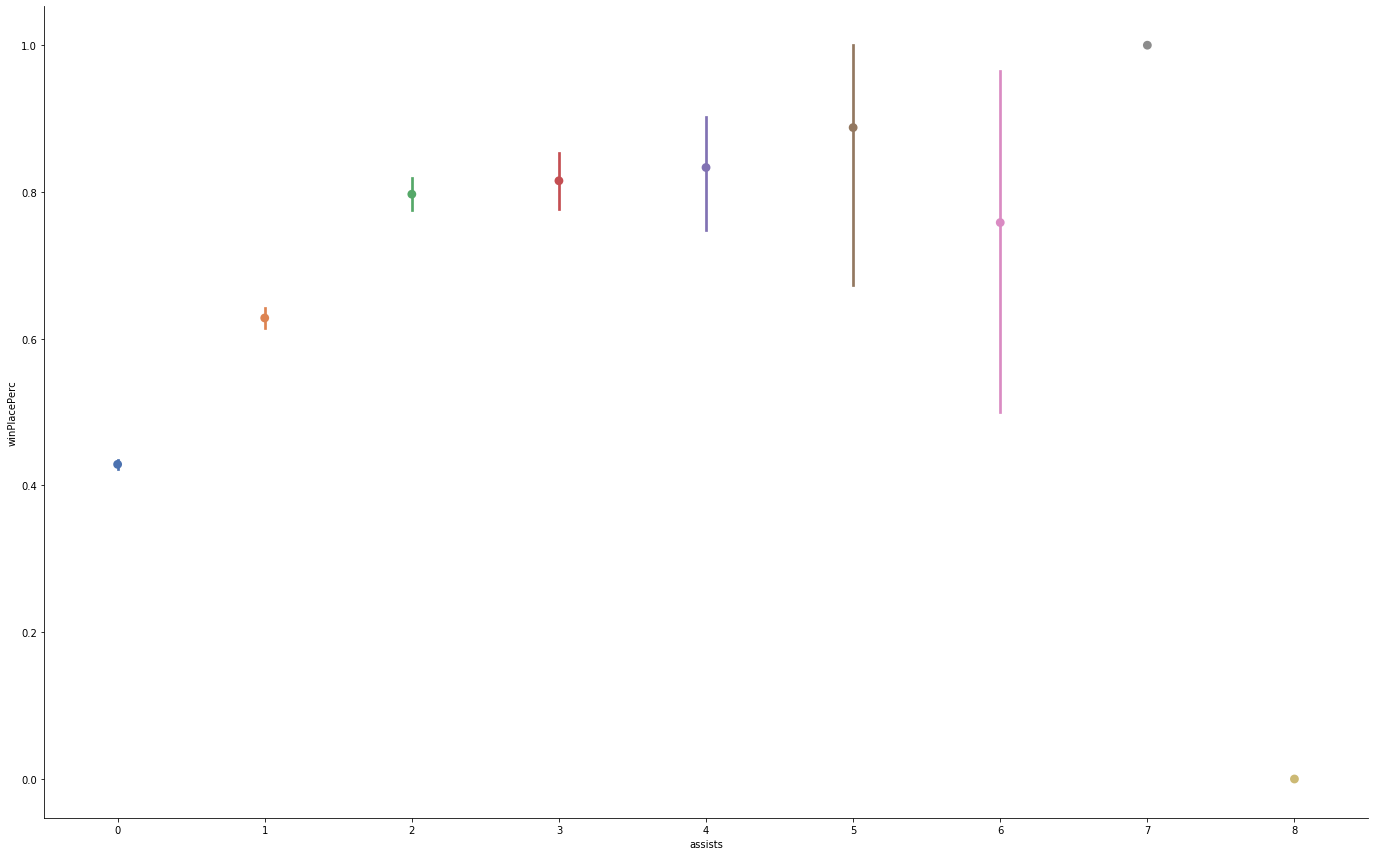

In [16]:
# Wizualizacja powiazania assists z winPlacePerc

Grid = sns.FacetGrid(train_df, size=12, aspect=1.6)
Grid.map(sns.pointplot, 'assists', 'winPlacePerc', palette='deep')

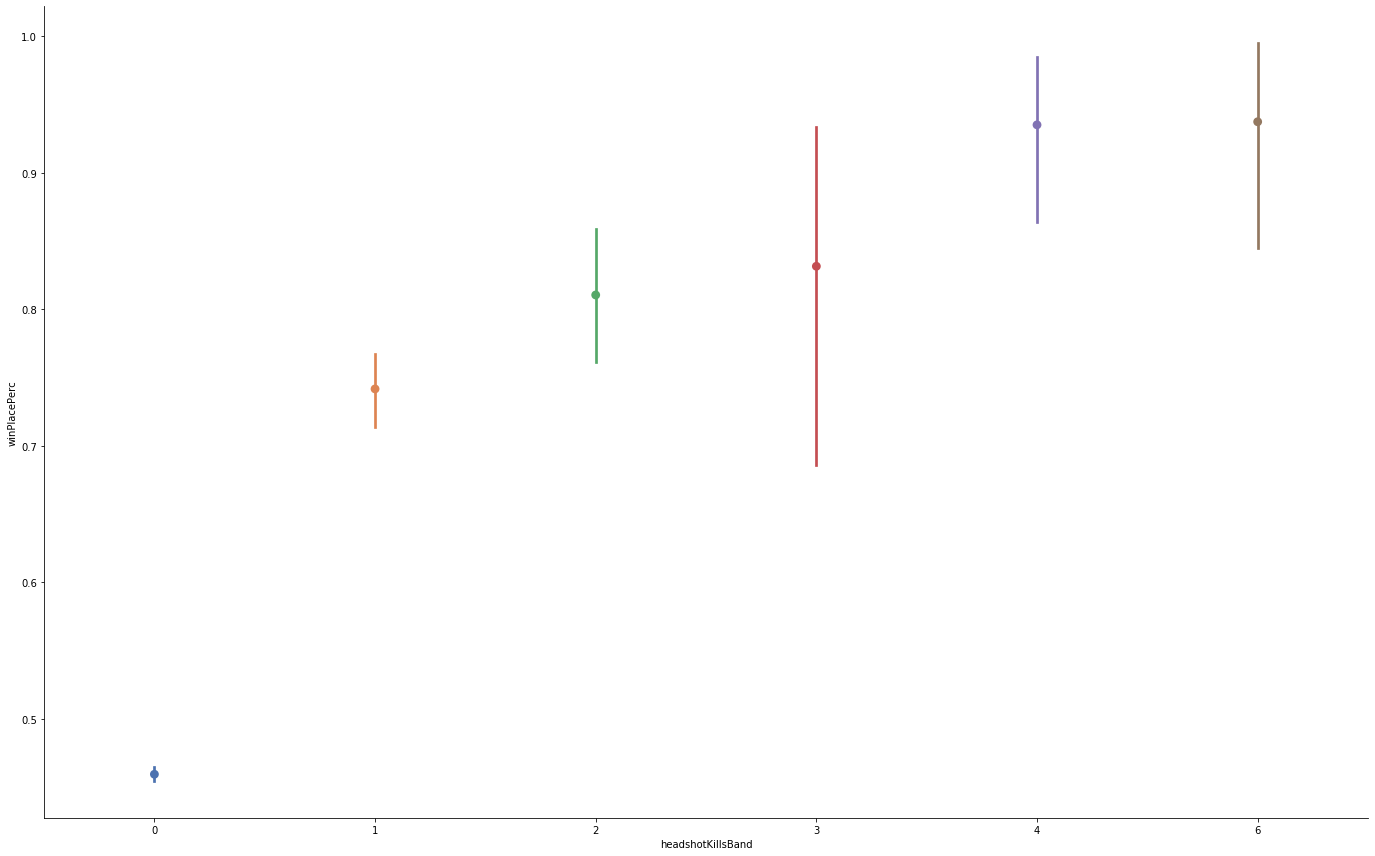

In [17]:
# Podzielenie headshotKills na 6 przedzialow i wizualizacji powiazania tej wartosci z winPlacePerc
przedzialy('headshotKills', 6)

Grid = sns.FacetGrid(train_df, size=12, aspect=1.6)
Grid.map(sns.pointplot, 'headshotKillsBand', 'winPlacePerc', palette='deep')

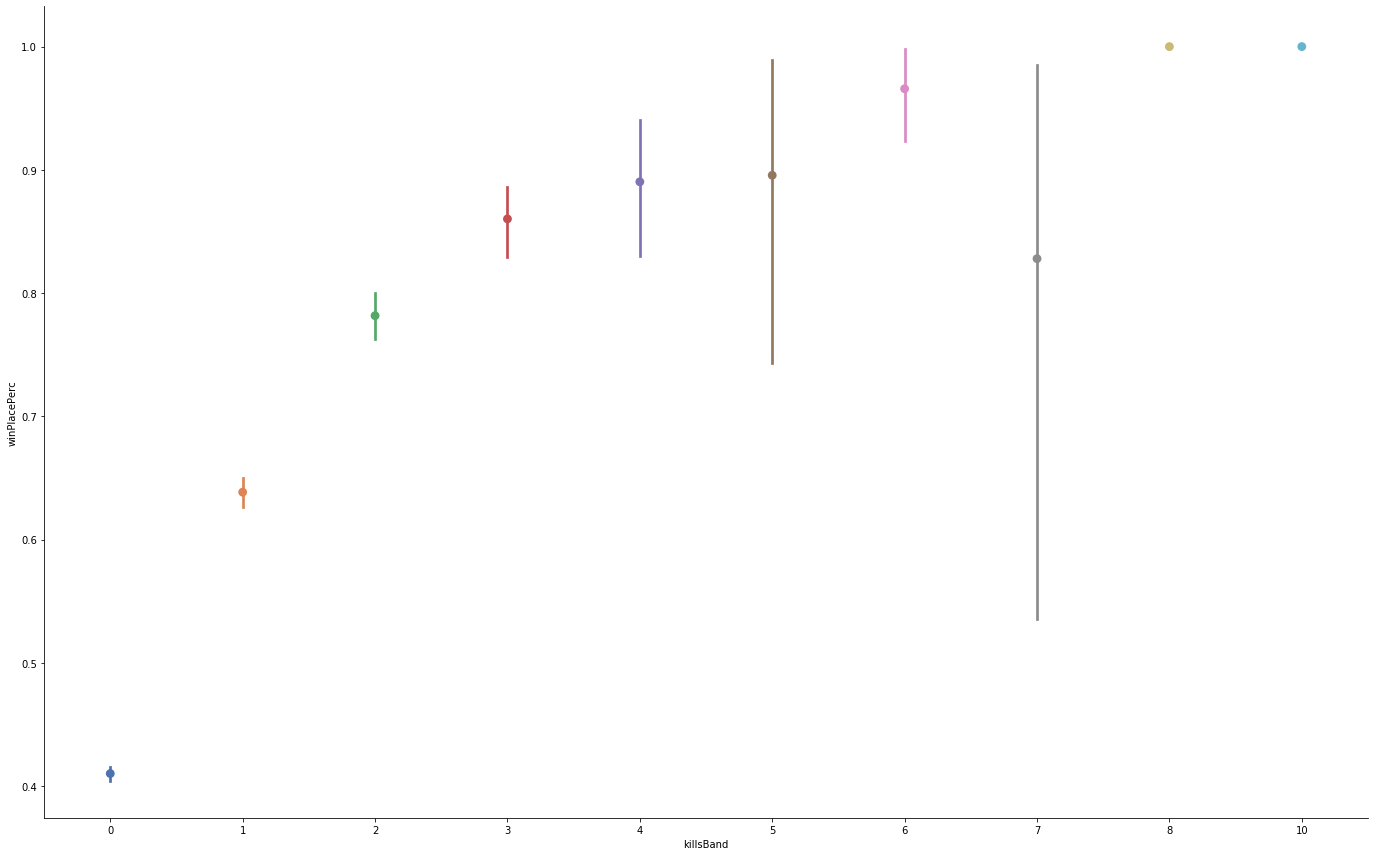

In [18]:
# Wizualizacja powiazania kills z winPlacePerc
przedzialy('kills', 10)

Grid = sns.FacetGrid(train_df, size=12, aspect=1.6)
Grid.map(sns.pointplot, 'killsBand', 'winPlacePerc', palette='deep')

In [19]:
# Usuwanie danych o pomijalym znaczeniu

# Dane związane z Id nie mają wpływu na wynik.
# Liczba podniesionych broni oraz przepłynięty dystans nie przekładają się na bezpośrednie statystyki gracza.
# Dane niektore dane maja rowniez bardzo duzo odchylenie standardowe, i wprowadzalyby zbyt duza niepewnosc

train_df = train_df.drop(['longestKill', 'roadKills', 'rankPoints', 'Id', 'groupId', 'matchId', 'swimDistance', 'numGroups', 'maxPlace', 'weaponsAcquiredBand'], axis = 1)
test_df = test_df.drop(['longestKill', 'roadKills', 'rankPoints', 'Id', 'groupId', 'matchId', 'swimDistance', 'numGroups', 'maxPlace', 'weaponsAcquiredBand'], axis = 1)


In [20]:
# Dopasowanie formy tabeli train_df do test_df, usuniecie rekordow z pustymi polami
train_df = train_df.dropna()
test_df = test_df.dropna()

X_train = train_df.drop("winPlacePerc", axis=1)
Y_train = train_df["winPlacePerc"]
X_test  = test_df.dropna().copy()

In [21]:
# Konwersja danych na format akceptowany przez funkcje fit
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y_train)
Y_train = training_scores_encoded


In [22]:
# Metoda regresji logistycznej 
logreg = LogisticRegression()
logreg.fit(X_train, training_scores_encoded)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, training_scores_encoded) * 100, 2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


13.88

In [23]:
# Metoda wektorow nosnych
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


98.88

In [24]:
# Metoda k najblizszych sasiadow

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

36.01

In [25]:
# Metoda Gaussa
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

8.84

In [26]:
# Metoda Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

0.38

In [27]:
# Metoda drzewa decyzyjnego
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [28]:
# Metoda Lasu Losowego
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [29]:
# Porownanie efektywnosci zastosowanych metod
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
6,Decision Tree,100.00
0,Support Vector Machines,98.88
1,KNN,36.01
2,Logistic Regression,13.88
4,Naive Bayes,8.84
5,Perceptron,0.38
